In [1]:
import pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as plt

#filename = r"D:\ruggbk\Documents\The Data Incubator\Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv"
ECSprogram = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

# Day 4 - Pandas

In [2]:
# 1) How many different companies are represented in the data set?

companies = pd.unique(ECSprogram['Company Name'])
print(str(len(companies)) +' different companies are represented in the data set')

439 different companies are represented in the data set


In [3]:
# 2) What is the total number of jobs created for businesses in Queens? 

Qjobs = ECSprogram.loc[ECSprogram['Borough'] == 'Queens','Job created']
Qjobs_sum = np.nansum(Qjobs)
print(str(int(Qjobs_sum))+' jobs were created in for businesses in Queens.')

102 jobs were created in for businesses in Queens.


In [4]:
# 3) How many different unique email domains names are there in the data set? 

emails = pd.unique(ECSprogram['company email'])
emails = [email for email in emails if (type(email) == str)]
domains = [email.split('@')[1] if '@' in email else email[0] for email in emails]
uniquedomains = pd.unique(domains)
print('There are '+ str(len(uniquedomains)) + ' unique email domains')

There are 361 unique email domains


In [5]:
# 4) Considering only NTAs with at least 5 listed businesses, what is the 
# average total savings and the total jobs created for each NTA? 

NTAdict = {}
NTAs = pd.unique(ECSprogram['NTA'])
midwoodjobs = ECSprogram.loc[ECSprogram['NTA'] == 'Midwood']

bigNTA = []
savings = []
jobscreated = []

for NTA in NTAs:
    if len(ECSprogram.loc[ECSprogram['NTA'] == NTA]) >= 5:
        bigNTA.append(NTA)
        savings.append(sum(ECSprogram.loc[ECSprogram['NTA'] == NTA, 'Total Savings'])/len(ECSprogram.loc[ECSprogram['NTA'] == NTA]))
        jobscreated.append(np.nansum(ECSprogram.loc[ECSprogram['NTA'] == NTA, 'Job created']))

jasdict = {'NTA': bigNTA, 'Average Savings': savings, 'Jobs Created': jobscreated}
df_jobsandsavings = pd.DataFrame(jasdict)
print(df_jobsandsavings)

                                                 NTA  Average Savings  \
0             SoHo-TriBeCa-Civic Center-Little Italy     37214.024000   
1                  Battery Park City-Lower Manhattan    469890.796667   
2                                   Sunset Park West     14316.976875   
3               Hunters Point-Sunnyside-West Maspeth     23931.398933   
4                                      College Point     17159.372857   
5           Carroll Gardens-Columbia Street-Red Hook     24337.390000   
6                                           Steinway     11227.155714   
7   DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000   
8                                        Hunts Point     39246.016154   
9                                     Bushwick South     26140.455000   
10                                    Manhattanville      2760.888889   
11                               Crown Heights North      4036.298889   
12          Queensbridge-Ravenswood-Long Island Cit

In [6]:
# 5) Save your result for the previous question as a CSV file. 
df_jobsandsavings.to_csv("ECSprogram_savingsandjobs.csv")

# Day 5 - Plotting (matplotlib)

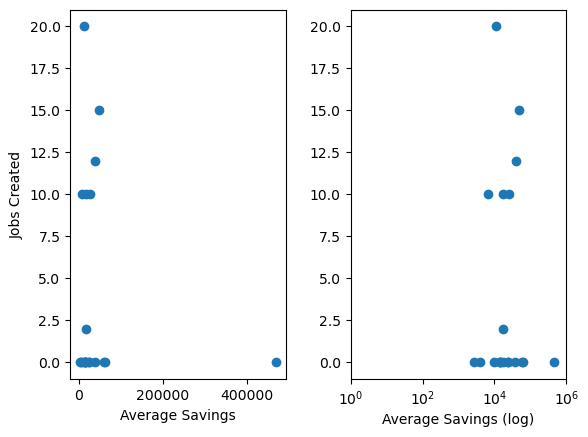

In [7]:
# Scatter plot of jobs created versus average savings.

fig, axs = plt.subplots(1,2)
axs[0].scatter(df_jobsandsavings['Average Savings'],df_jobsandsavings['Jobs Created'])
axs[0].set_xlabel('Average Savings')
axs[0].set_ylabel('Jobs Created')

axs[1].scatter(df_jobsandsavings['Average Savings'],df_jobsandsavings['Jobs Created'])
axs[1].set_xscale('log')
axs[1].set_xlabel('Average Savings (log)')
axs[1].set_xlim(1,1000000)

fig.subplots_adjust(wspace=0.3)

Text(0.5, 0, 'Average Savings')

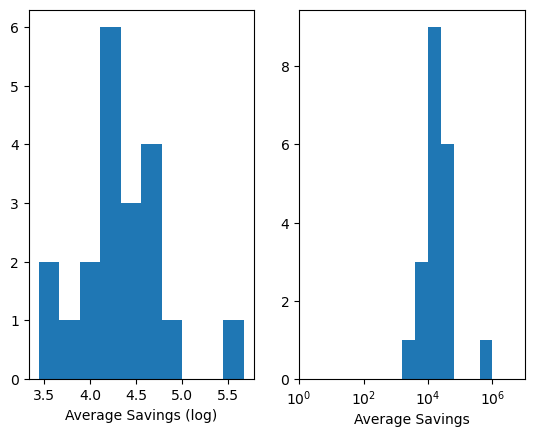

In [8]:
# histogram of the log of the average total savings.
logsavings = np.log10(df_jobsandsavings['Average Savings'])

fig, axs = plt.subplots(1,2)
axs[0].hist(logsavings)
axs[0].set_xlabel('Average Savings (log)')

axs[1].hist(df_jobsandsavings['Average Savings'], bins = np.logspace(np.log10(1), np.log10(1000000), 16))
axs[1].set_xscale('log')
axs[1].set_xlim(1,10000000)
axs[1].set_xlabel('Average Savings')

Text(0, 0.5, 'Jobs Created')

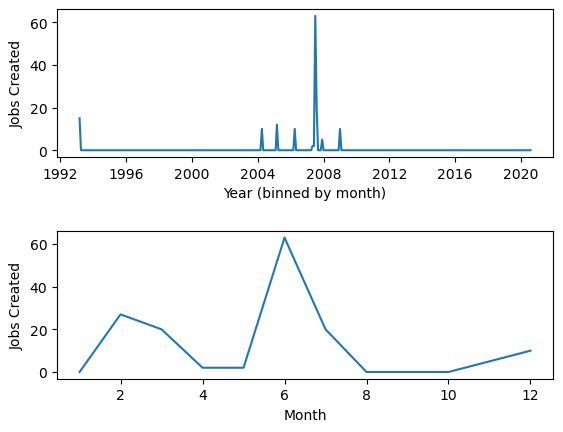

In [9]:
# line plot of the total jobs created for each month
ECSprogram['Effective Date (datetime)'] = pd.to_datetime(ECSprogram['Effective Date'])
ECSprogram.set_index('Effective Date (datetime)', inplace=True)
monthly_jobs = ECSprogram['Job created'].resample('M').sum()

ECSprogram['month'] = ECSprogram.index.month
jobs_by_month = ECSprogram.groupby('month')['Job created'].sum()

fig, axs = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)

axs[0].plot(monthly_jobs)
axs[0].set_xlabel('Year (binned by month)')
axs[0].set_ylabel('Jobs Created')

axs[1].plot(jobs_by_month)
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Jobs Created')